In [ ]:
import pandas as pd

In [ ]:
from keras.constraints import max_norm

In [ ]:
pip install extra-keras-datasets

In [ ]:
from extra_keras_datasets import stl10
(input_train, target_train), (input_test, target_test) = stl10.load_data() #import stl dataset

INFO:root:Loading dataset = stl-10


In [ ]:
from tensorflow import keras
base_model = keras.applications.VGG16(weights='imagenet', input_shape=(96,96,3), include_top=False)


In [ ]:

input_train.shape

(5000, 96, 96, 3)

In [ ]:
x_train=input_train/255 #normalize the pixel values

In [ ]:
input_test.shape

(8000, 96, 96, 3)

In [ ]:
x_test=input_test/255 #normalize the pixel values

In [ ]:
x_train.shape

(5000, 96, 96, 3)

In [ ]:
x_test.shape

(8000, 96, 96, 3)

In [ ]:
target_train.shape

(5000,)

In [ ]:
y_train=pd.get_dummies(target_train)

In [ ]:
target_test.shape

(8000,)

In [ ]:
y_test=pd.get_dummies(target_test)

In [ ]:
y_train.shape

(5000, 10)

In [ ]:
y_test.shape

(8000, 10)

In [ ]:
y_train

,1,2,3,4,5,6,7,8,9,10
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,1,0,0,0,0
4997,0,1,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [ ]:
#Add top layers on the base model

inputs = keras.Input(shape=(96, 96, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x=keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(64, activation = 'relu')(x)
x=keras.layers.Dropout(0.3)(x)
outputs = keras.layers.Dense(10, activation = 'softmax')(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0     

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=opt)

In [ ]:
#train top model
history1=model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=64, validation_split=0.25) 

Epoch 1/20
59/59 [==============================] - 50s 247ms/step - loss: 1.8619 - accuracy: 0.3213 - val_loss: 1.2720 - val_accuracy: 0.5416
Epoch 2/20
59/59 [==============================] - 10s 168ms/step - loss: 1.2267 - accuracy: 0.5715 - val_loss: 1.0300 - val_accuracy: 0.6288
Epoch 3/20
59/59 [==============================] - 10s 170ms/step - loss: 0.9446 - accuracy: 0.6813 - val_loss: 0.6893 - val_accuracy: 0.7704
Epoch 4/20
59/59 [==============================] - 10s 172ms/step - loss: 0.6164 - accuracy: 0.8024 - val_loss: 0.6192 - val_accuracy: 0.8120
Epoch 5/20
59/59 [==============================] - 10s 174ms/step - loss: 0.5043 - accuracy: 0.8448 - val_loss: 0.5866 - val_accuracy: 0.8096
Epoch 6/20
59/59 [==============================] - 10s 176ms/step - loss: 0.3995 - accuracy: 0.8741 - val_loss: 0.5194 - val_accuracy: 0.8432
Epoch 7/20
59/59 [==============================] - 11s 179ms/step - loss: 0.2492 - accuracy: 0.9267 - val_loss: 0.5644 - val_accuracy: 0.8384

In [ ]:
base_model.trainable = True

In [ ]:
#fine-tune model 
opt = keras.optimizers.Adam(learning_rate=0.000005)
model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=opt)

In [ ]:
history2=model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=64, validation_split=0.25)

Epoch 1/20
59/59 [==============================] - 12s 190ms/step - loss: 0.0203 - accuracy: 0.9957 - val_loss: 0.5778 - val_accuracy: 0.8696
Epoch 2/20
59/59 [==============================] - 11s 179ms/step - loss: 0.0064 - accuracy: 0.9992 - val_loss: 0.6203 - val_accuracy: 0.8720
Epoch 3/20
59/59 [==============================] - 11s 179ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6436 - val_accuracy: 0.8752
Epoch 4/20
59/59 [==============================] - 11s 179ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6916 - val_accuracy: 0.8712
Epoch 5/20
59/59 [==============================] - 11s 179ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.7237 - val_accuracy: 0.8680
Epoch 6/20
59/59 [==============================] - 11s 179ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.7535 - val_accuracy: 0.8704
Epoch 7/20
59/59 [==============================] - 11s 179ms/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.7849 - val_accuracy: 0.8720

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


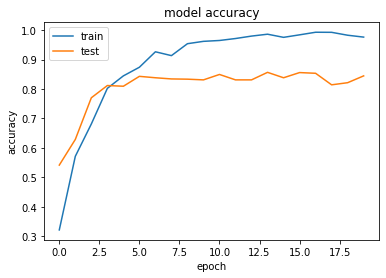

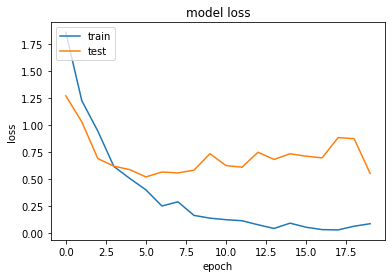

In [ ]:
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


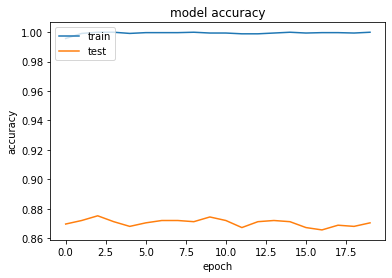

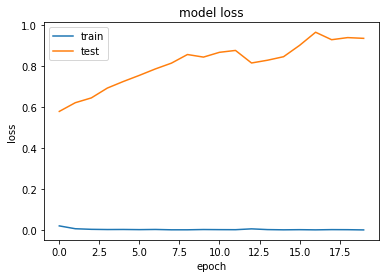

In [ ]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()